In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('../../../kaikeba/L2/Attrition/train.csv',index_col=0)
test=pd.read_csv('../../../kaikeba/L2/Attrition/test.csv',index_col=0)

In [3]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
user_id,,,,,,,,,,,,,,,,,,,,,
1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,...,3,80,1,29,2,2,1,0,0,0
1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,...,4,80,1,8,3,3,5,4,0,3
768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,...,2,80,1,8,3,2,7,7,7,5
569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,...,2,80,0,10,1,3,10,7,0,9
911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,4,80,0,1,4,3,1,0,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1374 to 684
Data columns (total 35 columns):
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1176 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus               1176 non-null object
MonthlyIncome       

In [5]:
train['Attrition'].value_counts()

No     988
Yes    188
Name: Attrition, dtype: int64

In [6]:
train.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
train['Attrition'].describe()

count     1176
unique       2
top         No
freq       988
Name: Attrition, dtype: object

In [10]:
train['Attrition']=train['Attrition'].map(lambda x:1 if x=='Yes' else 0)
from sklearn.preprocessing import LabelEncoder
train = train.drop(['EmployeeNumber', 'StandardHours'], axis=1)
test = test.drop(['EmployeeNumber', 'StandardHours'], axis=1)

In [11]:
attr=['Age','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
lbe_list=[]
for feature in attr:
    lbe=LabelEncoder()
    train[feature]=lbe.fit_transform(train[feature])
    test[feature]=lbe.transform(test[feature])
    lbe_list.append(lbe)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1374 to 684
Data columns (total 33 columns):
Age                         1176 non-null int64
Attrition                   1176 non-null int64
BusinessTravel              1176 non-null int64
DailyRate                   1176 non-null int64
Department                  1176 non-null int64
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EducationField              1176 non-null int64
EmployeeCount               1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1176 non-null int64
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null int64
JobSatisfaction             1176 non-null int64
MaritalStatus               1176 non-null int64
MonthlyIncome               1176 non-null int64
MonthlyRate                

In [13]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
user_id,,,,,,,,,,,,,,,,,,,,,
1374,40,0,2,605,2,21,3,1,1,4,...,3,3,1,29,2,2,1,0,0,0
1092,27,0,2,950,1,28,3,5,1,4,...,4,4,1,8,3,3,5,4,0,3
768,22,0,2,300,2,26,3,2,1,3,...,3,2,1,8,3,2,7,7,7,5
569,18,0,0,1434,2,8,4,1,1,1,...,3,2,0,10,1,3,10,7,0,9
911,7,1,1,599,2,24,1,1,1,3,...,3,4,0,1,4,3,1,0,1,0


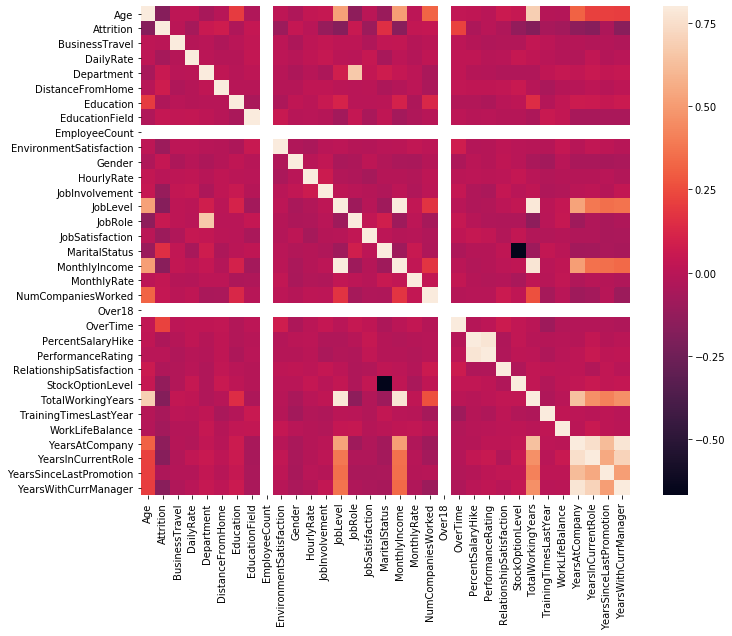

In [14]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
train = train.drop(['YearsInCurrentRole', 'PerformanceRating'], axis=1)
test = test.drop(['YearsInCurrentRole', 'PerformanceRating'], axis=1)

In [16]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [17]:
param = {'boosting_type':'gbdt',
                         'objective' : 'binary', #
                         # 'metric' : 'binary_logloss',
                         'metric' : 'auc',
                         # 'metric' : 'self_metric',
                         'learning_rate' : 0.01,
                         'max_depth' : 10,
                         'feature_fraction':0.8,
                         'bagging_fraction': 0.9,
                         'bagging_freq': 8,
                         'lambda_l1': 1,
                         'lambda_l2': 0,
#                          'scale_pos_weight':k,
#                         'is_unbalance':True
        }
X_train, X_valid, y_train, y_valid = train_test_split(train.drop('Attrition',axis=1), train['Attrition'], test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

In [18]:
model = lgb.train(param,train_data,valid_sets=[train_data,valid_data],num_boost_round = 10000 ,early_stopping_rounds=200,verbose_eval=25, categorical_feature=attr)
predict=model.predict(test)

Training until validation scores don't improve for 200 rounds
[25]	training's auc: 0.925767	valid_1's auc: 0.778457
[50]	training's auc: 0.936626	valid_1's auc: 0.775947
[75]	training's auc: 0.951482	valid_1's auc: 0.786424
[100]	training's auc: 0.962592	valid_1's auc: 0.798319
[125]	training's auc: 0.971133	valid_1's auc: 0.804103
[150]	training's auc: 0.975884	valid_1's auc: 0.807268
[175]	training's auc: 0.981579	valid_1's auc: 0.80705
[200]	training's auc: 0.985737	valid_1's auc: 0.809233
[225]	training's auc: 0.988935	valid_1's auc: 0.810215
[250]	training's auc: 0.990363	valid_1's auc: 0.816545
[275]	training's auc: 0.992078	valid_1's auc: 0.818618
[300]	training's auc: 0.9933	valid_1's auc: 0.820037
[325]	training's auc: 0.994611	valid_1's auc: 0.819601
[350]	training's auc: 0.995554	valid_1's auc: 0.823202
[375]	training's auc: 0.996201	valid_1's auc: 0.82593
[400]	training's auc: 0.996955	valid_1's auc: 0.826694
[425]	training's auc: 0.997746	valid_1's auc: 0.826803
[450]	trai

In [19]:
test['Attrition']=predict

In [20]:
test[['Attrition']].to_csv('submit_lr.csv')